# **Cálculo de climatologias dos acumulados mensal e climatologia por pentadas**

**Disciplina: Meteorologia Sinótica III**

**Professores:**

- Prof. Dr. Pedro Leite da Silva Dias

- Prof. Dr. Ricardo Hallak  

**Monitor:**

- Ronald Guiuseppi Ramírez Nina

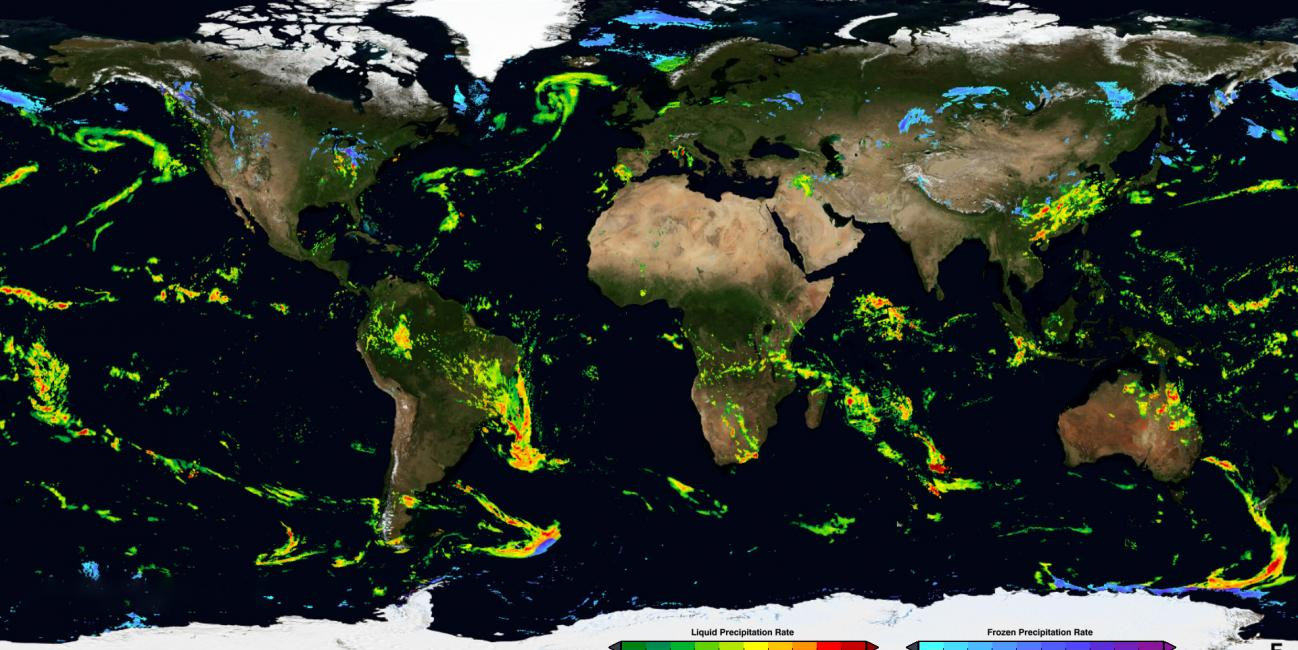

**Instalar dependências das livrarias para ler os dados**

In [2]:
!pip install cartopy
!pip install cmocean
!pip install xarray dask netCDF4 bottleneck pydap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.9/421.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.4/115.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 4.7 MB/s eta 0:00:00


**Importar livrarias**

In [1]:
# Importar livrarias

# Livrarias para ler e processar dados
import xarray as xr
import pandas as pd
import numpy as np

# Livrarias para gerar gráficos
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmocean

# Importar o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Acesso à base de dados do IMERG através do repositório disponível online**

- Link IMERG diário (Precipitação diária): http://apdrc.soest.hawaii.edu:80/dods/public_data/satellite_product/GPM_IMERG/daily_final_run

- Link IMERG MENSAL (Precipitação do acumulado mensal): http://apdrc.soest.hawaii.edu:80/dods/public_data/satellite_product/GPM_IMERG/monthly_final_run


# **Climatologia da precipitação acumulada mensal**

In [2]:
# URL dos dados de precipitação do IMERG
url_imerg_diario = 'http://apdrc.soest.hawaii.edu:80/dods/public_data/satellite_product/GPM_IMERG/daily_final_run'
url_imerg_mensal = 'http://apdrc.soest.hawaii.edu:80/dods/public_data/satellite_product/GPM_IMERG/monthly_final_run'
# Abrirndo o dataset de precipitação
ds_prec_imerg_mensal = xr.open_dataset(url_imerg_mensal)
ds_prec_imerg_mensal

/usr/local/lib/python3.11/dist-packages/xarray/coding/times.py:200: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  ref_date = _ensure_padded_year(ref_date)


<xarray.Dataset> Size: 33GB
Dimensions:  (time: 256, lat: 1800, lon: 3600)
Coordinates:
  * time     (time) datetime64[ns] 2kB 2000-06-01 2000-07-01 ... 2021-09-01
  * lat      (lat) float64 14kB -89.95 -89.85 -89.75 ... 89.75 89.85 89.95
  * lon      (lon) float64 29kB -179.9 -179.8 -179.8 ... 179.8 179.8 179.9
Data variables:
    quality  (time, lat, lon) float32 7GB ...
    grw      (time, lat, lon) float32 7GB ...
    prec     (time, lat, lon) float32 7GB ...
    plp      (time, lat, lon) float32 7GB ...
    err      (time, lat, lon) float32 7GB ...
Attributes:
    title:          GPM IMERG L3 V06 Research / Final Run Monthly
    Conventions:    COARDS\nGrADS
    dataType:       Grid
    documentation:  http://apdrc.soest.hawaii.edu/datadoc/gpm_imerg_mon.php
    history:        Fri Mar 21 10:47:31 HST 2025 : imported by GrADS Data Ser...

**Converter o formato das longitudes de 0° até 360° para o formato de -180° até +180°. Selecionar a área da Américo do Sul e o período da climatologia desde 2001-01-01 até 2020-12-31**

In [10]:
# Converter o formato das longitudes de 0° até 360° para o formato de -180° até +180°
#ds_prec_imerg_mensal['lon'] = (ds_prec_imerg_mensal.coords['lon'] + 180) % 360 - 180
#ds_prec_imerg_mensal = ds_prec_imerg_mensal.sortby(ds_prec_imerg_mensal.lon)

# Fazendo um recorte na América do Sul
ds_prec_imerg_mensal =  ds_prec_imerg_mensal['prec'].sel(lat=slice(-60.1,10), lon=slice(-90,-10),time=slice('2001-01-01','2020-12-31'))
ds_prec_imerg_mensal

<xarray.DataArray 'prec' (time: 240, lat: 701, lon: 800)> Size: 538MB
[134592000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2kB 2001-01-01 2001-02-01 ... 2020-12-01
  * lat      (lat) float64 6kB -60.05 -59.95 -59.85 -59.75 ... 9.75 9.85 9.95
  * lon      (lon) float64 6kB -89.95 -89.85 -89.75 ... -10.25 -10.15 -10.05
Attributes:
    long_name:  precipitation (mm/hr)

**Calculando a climatologia da precipitação mensal**

In [11]:
ds_prec_imerg_mensal_clima = ds_prec_imerg_mensal.groupby('time.month').mean('time')
ds_prec_imerg_mensal_clima

<xarray.DataArray 'prec' (month: 12, lat: 701, lon: 800)> Size: 27MB
array([[[0.1167231 , 0.11903571, 0.11854903, ..., 0.09264512,
         0.09062314, 0.08891248],
        [0.11883856, 0.11872904, 0.11909018, ..., 0.09717666,
         0.09533508, 0.09432504],
        [0.11993792, 0.12017825, 0.12076261, ..., 0.09886823,
         0.09887771, 0.09778968],
        ...,
        [0.00285613, 0.00291853, 0.00257114, ..., 0.00367368,
         0.00350555, 0.00324006],
        [0.00244104, 0.00238714, 0.0020981 , ..., 0.00342895,
         0.00314935, 0.0030987 ],
        [0.00230997, 0.00273449, 0.00277992, ..., 0.00289233,
         0.00270744, 0.00289753]],

       [[0.2647101 , 0.26772302, 0.26766866, ..., 0.09207673,
         0.09292026, 0.09171253],
        [0.2658599 , 0.2678468 , 0.26976478, ..., 0.09052913,
         0.08970243, 0.08963577],
        [0.2695551 , 0.27108127, 0.27344012, ..., 0.09118916,
         0.09119422, 0.09021914],
...
        [0.10478838, 0.1106158 , 0.10590879, ..., 0.04931758,
         0.04451617, 0.04158107],
        [0.10620348, 0.10845218, 0.10174467, ..., 0.0455532 ,
         0.03925227, 0.04124735],
        [0.10538914, 0.10642608, 0.10161404, ..., 0.03860334,
         0.03491229, 0.03661052]],

       [[0.08972958, 0.08944157, 0.08939335, ..., 0.08937845,
         0.09069805, 0.09048294],
        [0.08969096, 0.0903692 , 0.09029423, ..., 0.11633806,
         0.11906891, 0.11975982],
        [0.09026124, 0.09022518, 0.0905126 , ..., 0.11858529,
         0.12113944, 0.12210043],
        ...,
        [0.02100257, 0.02122013, 0.01951887, ..., 0.00752433,
         0.00715652, 0.00696571],
        [0.02185489, 0.02101242, 0.02023419, ..., 0.0067138 ,
         0.0069439 , 0.00783475],
        [0.01718219, 0.01665733, 0.01547503, ..., 0.00604944,
         0.00653017, 0.0065879 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 6kB -60.05 -59.95 -59.85 -59.75 ... 9.75 9.85 9.95
  * lon      (lon) float64 6kB -89.95 -89.85 -89.75 ... -10.25 -10.15 -10.05
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:  precipitation (mm/hr)

**Salvar o dataset da climatologia em um arquivo do tipo NetCDF**

In [20]:
# Salvar dado da climatologia da precipitação acumulada mensal
ds_prec_imerg_mensal_clima.to_netcdf('imerg_final_run_montly_climatology_2001-to-2020.nc')

**Ler o arquivo NetCDF da climatologia calculada anteriormente**

In [21]:
# Abrir o novo arquivo criado
path_clima = '/content/drive/MyDrive/USP-CURSOS/MONITORIA/METEOROLOGIA-SINOTICA-III-2025/imerg_final_run_montly_climatology_2001-to-2020.nc'
ds_clima = xr.open_dataset(path_clima)
ds_clima

<xarray.Dataset> Size: 27MB
Dimensions:  (lat: 701, lon: 800, month: 12)
Coordinates:
  * lat      (lat) float64 6kB -60.05 -59.95 -59.85 -59.75 ... 9.75 9.85 9.95
  * lon      (lon) float64 6kB -89.95 -89.85 -89.75 ... -10.25 -10.15 -10.05
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    prec     (month, lat, lon) float32 27MB ...

**Fazer os plots da climatologia da precipitação acumulada mensal**

<ipython-input-27-998ea519567d>:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Deixar espaço para a barra de cores


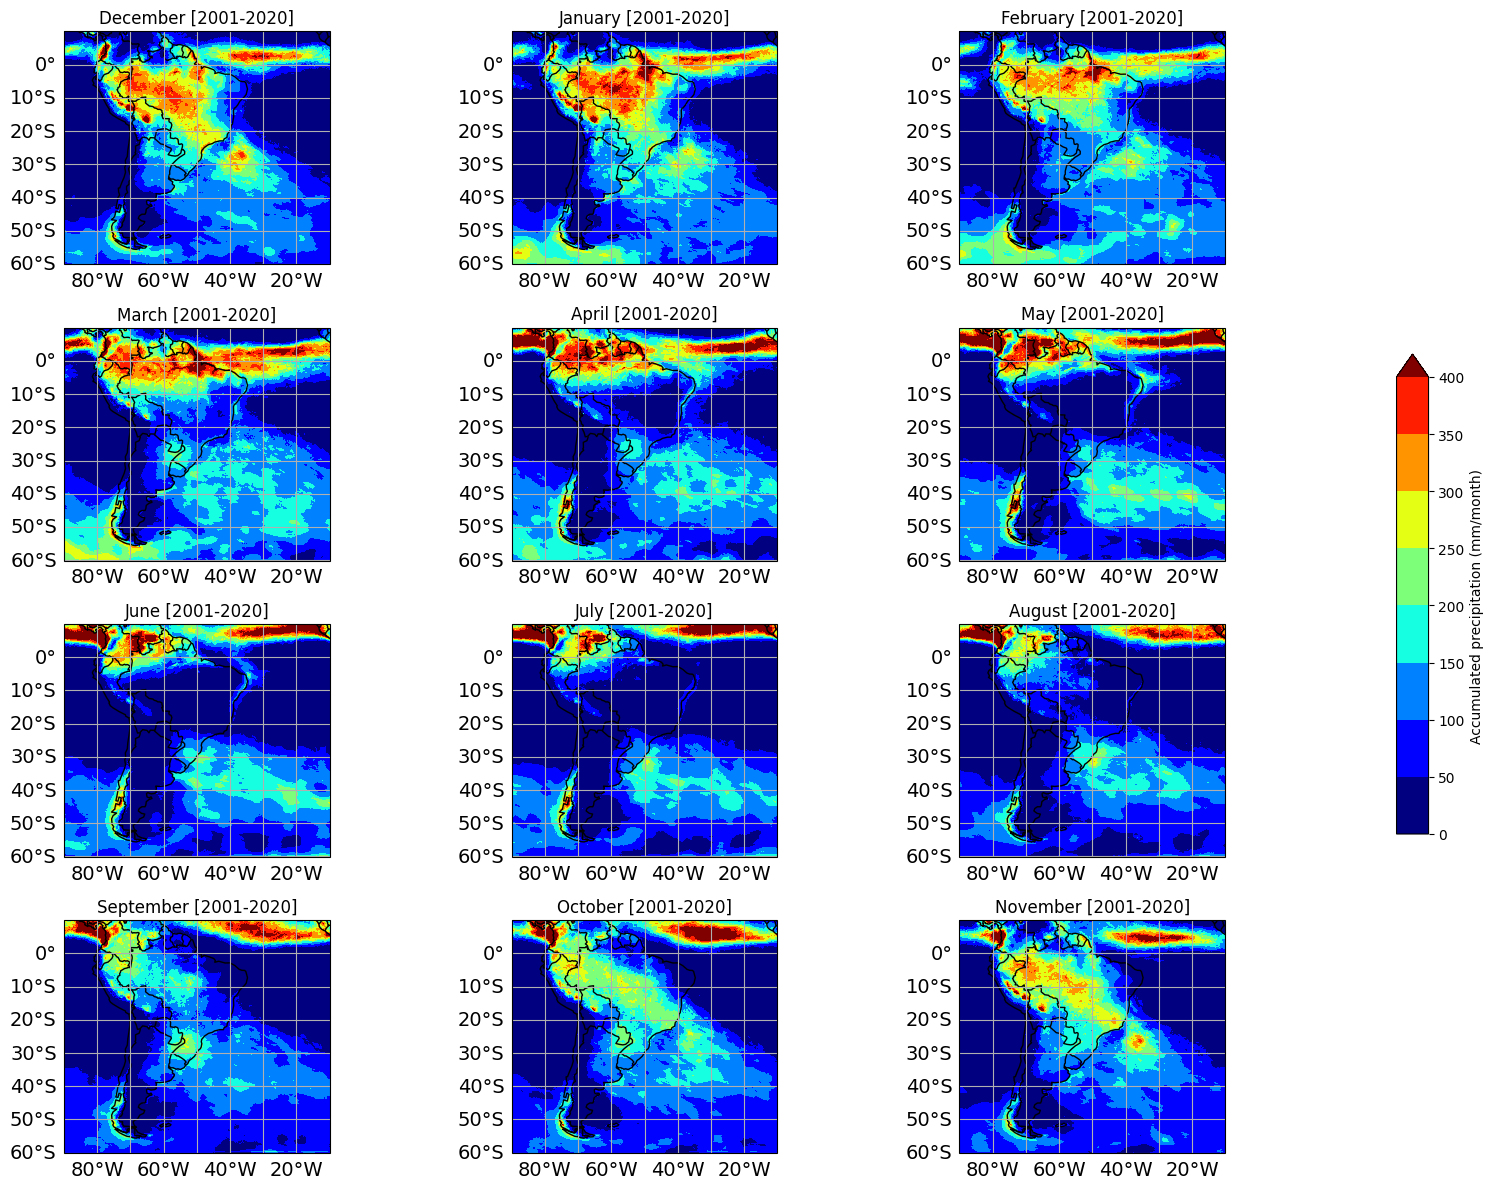

In [27]:
# Definir número de linhas e colunas para o grid de plots
n_rows = 4  # 4 linhas
n_cols = 3  # 4 colunas

# Criar a figura e os eixos para múltiplos mapas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# Selecionar os tempos disponíveis
times = ds_clima['month'].values

# Variável para armazenar a última imagem plotada
im = None

# Dias do mês
numero_dias_mes = [31,28,31,30,31,30,
         31,31,30,31,30,31]

# Titulo por mês
title = ['January [2001-2020]', 'February [2001-2020]', 'March [2001-2020]', 'April [2001-2020]', 'May [2001-2020]', 'June [2001-2020]',
         'July [2001-2020]', 'August [2001-2020]', 'September [2001-2020]', 'October [2001-2020]', 'November [2001-2020]', 'December [2001-2020]']

# Loop para plotar cada pentada em um subplot
for i, ax in enumerate(axes.flat):  # Percorre todos os subplots
    if i < len(times):
        # Plotar os dados para a pentada correspondente e armazenar a última imagem
        im = (ds_clima['prec'].sel(month=times[i]) * 24 * numero_dias_mes[i-1]).plot(
            ax=ax,
            x='lon',
            y='lat',
            vmin=0,
            vmax=400,
            levels = np.arange(0,401,50),
            cmap='jet',#cmocean.cm.rain,
            transform=ccrs.PlateCarree(),
            add_colorbar=False  # Evita múltiplas barras de cor
        )

        # Adicionar feições geográficas
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
        ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.5)
        ax.add_feature(cfeature.LAKES, edgecolor='black')

        # Agregando linhas da grade
        gl = ax.gridlines(draw_labels = True)
        # Removendo os labels da grade do lado superior
        gl.top_labels = False
        # Removendo os labels da grade do lado direito
        gl.right_labels = False
        # Estabelendo o size dos labels no eixo X
        gl.xlabel_style = {'size': 14}
        # Estabelecendo o size dos labels no eixo Y
        gl.ylabel_style = {'size': 14}

        # Adicionar título com a data correspondente
        ax.set_title(title[i-1], fontsize=12)

    else:
        ax.set_visible(False)  # Esconder subplot vazio caso haja menos de 16 tempos

# Adicionar barra de cores comum à direita da figura usando a última imagem plotada
if im is not None:
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # Posição da barra de cores
    plt.colorbar(im, cax=cbar_ax, ticks=np.arange(0, 501, 50), label='Accumulated precipitation (mm/month)')

# Ajustar layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Deixar espaço para a barra de cores

# Mostrar os mapas
plt.show()

# **Cálculo da climatologia da precipitação por pentadas**

**Ler os dados de precipitação acumulada diária**

In [3]:
# Abrirndo o dataset de precipitação
ds_prec_imerg_diario = xr.open_dataset(url_imerg_diario)
ds_prec_imerg_diario

/usr/local/lib/python3.11/dist-packages/xarray/coding/times.py:200: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  ref_date = _ensure_padded_year(ref_date)


<xarray.Dataset> Size: 2TB
Dimensions:          (time: 7792, lat: 1800, lon: 3600)
Coordinates:
  * time             (time) datetime64[ns] 62kB 2000-06-01 ... 2021-09-30
  * lat              (lat) float64 14kB -89.95 -89.85 -89.75 ... 89.85 89.95
  * lon              (lon) float64 29kB -179.9 -179.8 -179.8 ... 179.8 179.9
Data variables:
    prec             (time, lat, lon) float32 202GB ...
    prec_cnt         (time, lat, lon) float32 202GB ...
    prec_cnt_cond    (time, lat, lon) float32 202GB ...
    hqprec           (time, lat, lon) float32 202GB ...
    hqprec_cnt       (time, lat, lon) float32 202GB ...
    hqprec_cnt_cond  (time, lat, lon) float32 202GB ...
    err              (time, lat, lon) float32 202GB ...
    err_cnt          (time, lat, lon) float32 202GB ...
Attributes:
    title:          GPM IMERG L3 V06 Research / Final Run Daily
    Conventions:    COARDS\nGrADS
    dataType:       Grid
    documentation:  http://apdrc.soest.hawaii.edu/datadoc/gpm_imerg_day.php
    history:        Fri Mar 21 10:47:31 HST 2025 : imported by GrADS Data Ser...

**Fazer um recorte na América do Sul e no período de 01/01/2001 até 12/12/2021**

In [4]:
# Fazendo um recorte na América do Sul
ds_prec_imerg_diario =  ds_prec_imerg_diario['prec'].sel(lat=slice(-60.1,10), lon=slice(-90,-10),time=slice('2001-01-01','2020-12-31'))
ds_prec_imerg_diario

<xarray.DataArray 'prec' (time: 7305, lat: 701, lon: 800)> Size: 16GB
[4096644000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 58kB 2001-01-01 2001-01-02 ... 2020-12-31
  * lat      (lat) float64 6kB -60.05 -59.95 -59.85 -59.75 ... 9.75 9.85 9.95
  * lon      (lon) float64 6kB -89.95 -89.85 -89.75 ... -10.25 -10.15 -10.05
Attributes:
    long_name:  daily accumulated precipitation (combined microwave-ir) estim...

**Apagar os 29 de fevereiro para garantir que todos os anos tenham 365 dias**

In [5]:
# ------------------------------
# Remover os dias 29 de fevereiro
# ------------------------------
# Converte o tempo em um índice do Pandas
time_index = ds_prec_imerg_diario.time.to_index()
mask = ~((time_index.month == 2) & (time_index.day == 29))
ds_prec_imerg_diario = ds_prec_imerg_diario.sel(time=mask)
ds_prec_imerg_diario


<xarray.DataArray 'prec' (time: 7300, lat: 701, lon: 800)> Size: 16GB
[4093840000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 58kB 2001-01-01 2001-01-02 ... 2020-12-31
  * lat      (lat) float64 6kB -60.05 -59.95 -59.85 -59.75 ... 9.75 9.85 9.95
  * lon      (lon) float64 6kB -89.95 -89.85 -89.75 ... -10.25 -10.15 -10.05
Attributes:
    long_name:  daily accumulated precipitation (combined microwave-ir) estim...

**Criar um indice manual dos dias do ano desde 1 até 365 para os 20 anos. Além disso, asignar a coordenada de pentadas para facilitar o cálculo da climatologia por pentadas**

In [6]:
# Verifique que o dataset não tem mais 29 de fevereiro
time_index = ds_prec_imerg_diario.time.to_index()
assert not ((time_index.month == 2) & (time_index.day == 29)).any(), "Ainda existem dias 29 de fevereiro!"

# Total de anos (após remoção dos dias 29/02)
anos = np.unique(time_index.year)
n_anos = len(anos)

# Criar vetor dayofyear de 1 a 365 repetido para cada ano
dias_ano_padrao = np.tile(np.arange(1, 366), n_anos)

# Adicionar como coordenada
ds_prec_imerg_diario = ds_prec_imerg_diario.assign_coords(dayofyear=("time", dias_ano_padrao))

# Calcular número da pentada fixa (1 a 73)
pentadas = ((ds_prec_imerg_diario.dayofyear - 1) // 5 + 1)

ds_prec_imerg_diario = ds_prec_imerg_diario.assign_coords(pentada=("time", pentadas.data))
ds_prec_imerg_diario

<xarray.DataArray 'prec' (time: 7300, lat: 701, lon: 800)> Size: 16GB
[4093840000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 58kB 2001-01-01 2001-01-02 ... 2020-12-31
  * lat        (lat) float64 6kB -60.05 -59.95 -59.85 -59.75 ... 9.75 9.85 9.95
  * lon        (lon) float64 6kB -89.95 -89.85 -89.75 ... -10.25 -10.15 -10.05
    dayofyear  (time) int64 58kB 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365
    pentada    (time) int64 58kB 1 1 1 1 1 2 2 2 2 ... 72 72 72 73 73 73 73 73
Attributes:
    long_name:  daily accumulated precipitation (combined microwave-ir) estim...

**Fazer uma test do cálculo de pentadas com dados da precipitação diária só para um ano. Então primeiro escolher uma amostragem de só um ano**

In [8]:
x = ds_prec_imerg_diario.sel(time=slice('2001-01-01','2001-12-31'))
x

<xarray.DataArray 'prec' (time: 365, lat: 701, lon: 800)> Size: 819MB
[204692000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 3kB 2001-01-01 2001-01-02 ... 2001-12-31
  * lat        (lat) float64 6kB -60.05 -59.95 -59.85 -59.75 ... 9.75 9.85 9.95
  * lon        (lon) float64 6kB -89.95 -89.85 -89.75 ... -10.25 -10.15 -10.05
    dayofyear  (time) int64 3kB 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365
    pentada    (time) int64 3kB 1 1 1 1 1 2 2 2 2 ... 72 72 72 72 73 73 73 73 73
Attributes:
    long_name:  daily accumulated precipitation (combined microwave-ir) estim...

**Calcular as pentadas como uma somatória da precipitação dos 5 dias sucessivos com os dados da amostragem do primeiro ano**

In [10]:
x_pentada = x.groupby(['time.year','pentada']).sum(dim='time')
x_pentada

<xarray.DataArray 'prec' (lat: 701, lon: 800, year: 1, pentada: 73)> Size: 164MB
array([[[[5.12611103e+00, 7.45632052e-01, 3.22728634e-01, ...,
          8.46788168e-01, 3.86170228e-03, 4.40267992e+00]],

        [[5.53832865e+00, 7.34199762e-01, 2.22846508e-01, ...,
          1.68450952e+00, 1.08127668e-01, 3.68524504e+00]],

        [[7.42594624e+00, 6.26465738e-01, 4.90034014e-01, ...,
          1.54181886e+00, 1.08127668e-01, 3.05709124e+00]],

        ...,

        [[1.64631951e+00, 1.96805120e-01, 1.23140570e-02, ...,
          1.32435694e+01, 6.07424927e+00, 4.45310097e+01]],

        [[1.41830552e+00, 2.17056245e-01, 8.69545247e-03, ...,
          1.45611534e+01, 6.75952339e+00, 3.65187607e+01]],

        [[1.42298508e+00, 9.80342627e-02, 4.04132949e-03, ...,
          1.18026199e+01, 8.06380367e+00, 3.25848579e+01]]],

...
       [[[5.04769990e-03, 0.00000000e+00, 0.00000000e+00, ...,
          7.62128234e-01, 1.48154676e-01, 0.00000000e+00]],

        [[1.05391536e-03, 0.00000000e+00, 0.00000000e+00, ...,
          4.18701857e-01, 1.13444842e-01, 0.00000000e+00]],

        [[1.26540605e-02, 0.00000000e+00, 0.00000000e+00, ...,
          5.13336778e-01, 9.18928832e-02, 0.00000000e+00]],

        ...,

        [[7.39018977e-01, 3.69241118e-01, 4.87045050e-02, ...,
          5.33173494e-02, 2.59527145e-03, 0.00000000e+00]],

        [[7.93737173e-01, 1.72107488e-01, 6.84806006e-03, ...,
          3.08030229e-02, 3.14869778e-03, 0.00000000e+00]],

        [[5.77889740e-01, 1.38175279e-01, 0.00000000e+00, ...,
          3.43205035e-02, 1.45009579e-03, 0.00000000e+00]]]],
      dtype=float32)
Coordinates:
  * year     (year) int64 8B 2001
  * pentada  (pentada) int64 584B 1 2 3 4 5 6 7 8 9 ... 66 67 68 69 70 71 72 73
  * lat      (lat) float64 6kB -60.05 -59.95 -59.85 -59.75 ... 9.75 9.85 9.95
  * lon      (lon) float64 6kB -89.95 -89.85 -89.75 ... -10.25 -10.15 -10.05
Attributes:
    long_name:  daily accumulated precipitation (combined microwave-ir) estim...

**Fazer um plot da primeira pentada do 2001**

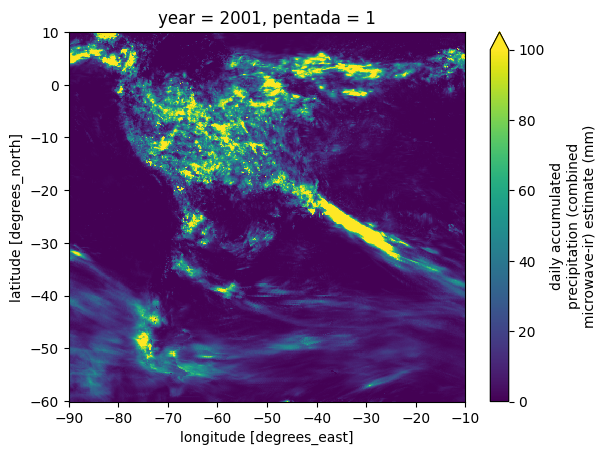

In [13]:
x_pentada.sel(pentada=1).plot(vmax=100)

**Para fazer um test com o procedimento anterior do cálculo das pentadas, criar um objeto e calcular as pentadas da forma manual escolhendo uma amostra de só os primeiros 5 dias do 01-01-2001 até 05-01-2001. Finalmente, fazer um plot da primeira pentada do 2001 e comparar com o procedimento anterior. Uma vez verificado que os resultados são igual, podemos proceder com o cálculo de todas as pentadas no período do 01-01-2001 até 31-12-2020**

<xarray.DataArray 'prec' (lat: 701, lon: 800)> Size: 2MB
array([[5.12611103e+00, 5.53832865e+00, 7.42594624e+00, ...,
        1.64631951e+00, 1.41830552e+00, 1.42298508e+00],
       [4.80013800e+00, 5.87795687e+00, 6.10629988e+00, ...,
        4.34076691e+00, 4.32577276e+00, 4.01436853e+00],
       [6.86425066e+00, 5.87660408e+00, 6.40312719e+00, ...,
        4.14920092e+00, 4.06404638e+00, 3.95159030e+00],
       ...,
       [5.54692291e-04, 1.90334264e-04, 1.32023720e-02, ...,
        5.23167491e-01, 3.63181978e-01, 4.97347683e-01],
       [4.27113101e-03, 7.21100019e-04, 6.23039417e-02, ...,
        7.32479870e-01, 6.66376948e-01, 5.41235328e-01],
       [5.04769990e-03, 1.05391536e-03, 1.26540605e-02, ...,
        7.39018977e-01, 7.93737173e-01, 5.77889740e-01]], dtype=float32)
Coordinates:
  * lat      (lat) float64 6kB -60.05 -59.95 -59.85 -59.75 ... 9.75 9.85 9.95
  * lon      (lon) float64 6kB -89.95 -89.85 -89.75 ... -10.25 -10.15 -10.05


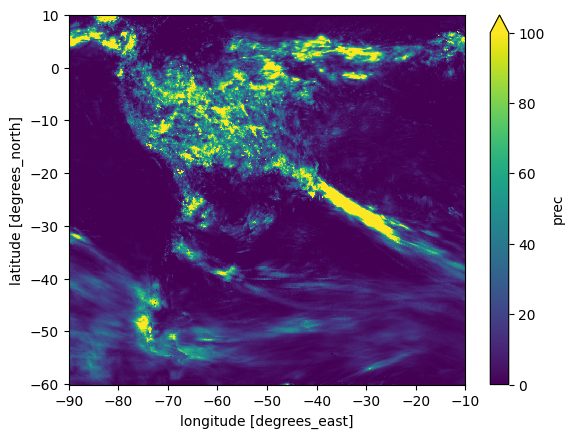

In [14]:
y = ds_prec_imerg_diario.sel(time=slice('2001-01-01','2001-01-05'))
y_pentada = y.sum(dim='time')
print(y_pentada)
y_pentada.plot(vmax=100)

**Cálculo de todas as pentadas da precipitação desde o 01-01-2001 até 31-12-2020**

In [7]:
ds_pentadas_ano = ds_prec_imerg_diario.groupby(["time.year", "pentada"]).sum(dim="time")
ds_pentadas_ano

<xarray.DataArray 'prec' (lat: 701, lon: 800, year: 20, pentada: 73)> Size: 3GB
array([[[[5.12611103e+00, 7.45632052e-01, 3.22728634e-01, ...,
          8.46788168e-01, 3.86170228e-03, 4.40267992e+00],
         [1.08333044e+01, 7.85094082e-01, 3.12995739e+01, ...,
          1.11146677e+00, 1.88723433e+00, 4.90368938e+00],
         [3.43700829e+01, 1.42287505e+00, 1.04471277e-04, ...,
          1.90705872e+00, 1.52607765e+01, 1.44233294e+01],
         ...,
         [4.44793844e+00, 2.31608200e+01, 3.65597010e+00, ...,
          2.34321575e+01, 5.03963280e+00, 2.15850854e+00],
         [2.50390682e+01, 2.47231712e+01, 2.66952038e-01, ...,
          2.57832432e+00, 4.29388523e-01, 3.03022718e+00],
         [4.76003151e+01, 8.00092545e+01, 2.17385559e+01, ...,
          2.34940834e+01, 4.45408434e-01, 2.74136200e+01]],

        [[5.53832865e+00, 7.34199762e-01, 2.22846508e-01, ...,
          1.68450952e+00, 1.08127668e-01, 3.68524504e+00],
         [1.14090014e+01, 6.36870921e-01, 3.15146656e+01, ...,
          1.31378937e+00, 2.48652506e+00, 5.33107805e+00],
         [3.40451736e+01, 3.17601037e+00, 4.82486077e-02, ...,
          1.62963879e+00, 1.43087864e+01, 1.21736460e+01],
...
          1.83345246e+00, 5.25636077e-02, 8.08178633e-02],
         [1.42587751e-01, 3.12148668e-02, 2.59116679e-01, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          2.49007121e-01, 9.65395570e-02, 0.00000000e+00]],

        [[5.77889740e-01, 1.38175279e-01, 0.00000000e+00, ...,
          3.43205035e-02, 1.45009579e-03, 0.00000000e+00],
         [1.14603989e-01, 3.69514275e+00, 2.04013109e+00, ...,
          8.01653117e-02, 0.00000000e+00, 0.00000000e+00],
         [1.40865818e-02, 2.87489011e-03, 2.94663534e-02, ...,
          1.44110841e-03, 6.76813652e-04, 3.88442762e-02],
         ...,
         [0.00000000e+00, 3.55319530e-02, 0.00000000e+00, ...,
          1.82868552e+00, 1.13770001e-01, 0.00000000e+00],
         [1.75709594e-02, 6.01754189e-02, 3.04393202e-01, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          3.94662946e-01, 2.28225980e-02, 0.00000000e+00]]]],
      dtype=float32)
Coordinates:
  * year     (year) int64 160B 2001 2002 2003 2004 2005 ... 2017 2018 2019 2020
  * pentada  (pentada) int64 584B 1 2 3 4 5 6 7 8 9 ... 66 67 68 69 70 71 72 73
  * lat      (lat) float64 6kB -60.05 -59.95 -59.85 -59.75 ... 9.75 9.85 9.95
  * lon      (lon) float64 6kB -89.95 -89.85 -89.75 ... -10.25 -10.15 -10.05
Attributes:
    long_name:  daily accumulated precipitation (combined microwave-ir) estim...

**Salvar o dataset das pentadas desde o 2001 até o 2020**

In [8]:
ds_pentadas_ano.to_netcdf('ds_pentadas_2001-to-2020.nc')

**Calculando a climatologia da precipitação por pentadas**

In [9]:
clima_pentada = ds_pentadas_ano.mean(dim='year')
clima_pentada

<xarray.DataArray 'prec' (lat: 701, lon: 800, pentada: 73)> Size: 164MB
array([[[1.56730938e+01, 1.54795609e+01, 1.05769482e+01, ...,
         8.81094742e+00, 1.00997515e+01, 7.61563253e+00],
        [1.54760237e+01, 1.58718166e+01, 1.06768866e+01, ...,
         8.46628380e+00, 1.00258503e+01, 7.29610300e+00],
        [1.56490526e+01, 1.53844910e+01, 1.04849043e+01, ...,
         8.51882362e+00, 9.81488228e+00, 7.44981527e+00],
        ...,
        [8.14150143e+00, 1.72815380e+01, 1.51175718e+01, ...,
         8.52170563e+00, 7.70767498e+00, 1.58782635e+01],
        [8.26736927e+00, 1.67434425e+01, 1.47543230e+01, ...,
         8.84093952e+00, 7.79260874e+00, 1.56034698e+01],
        [8.13092041e+00, 1.62071381e+01, 1.45407152e+01, ...,
         8.31093979e+00, 7.31619930e+00, 1.51981459e+01]],

       [[1.52371874e+01, 1.54987211e+01, 1.09883213e+01, ...,
         9.02919197e+00, 9.85627842e+00, 7.77496195e+00],
        [1.52241850e+01, 1.51554356e+01, 1.08070049e+01, ...,
         8.78076267e+00, 9.77124977e+00, 7.88916540e+00],
        [1.49383745e+01, 1.54874830e+01, 1.09676094e+01, ...,
         9.07493782e+00, 9.59727669e+00, 7.82709265e+00],
...
        [2.47432426e-01, 7.23612368e-01, 2.11026356e-01, ...,
         3.63552988e-01, 2.76598837e-02, 2.04457045e-01],
        [2.82220095e-01, 6.54567838e-01, 1.95853055e-01, ...,
         1.90449327e-01, 7.53422361e-03, 2.35356882e-01],
        [2.05611393e-01, 4.46305692e-01, 1.72256917e-01, ...,
         1.80322334e-01, 7.59314373e-03, 2.79413939e-01]],

       [[3.89035672e-01, 1.72409698e-01, 6.02689087e-01, ...,
         1.01620042e+00, 3.12709928e-01, 3.56175363e-01],
        [4.24477339e-01, 2.25864694e-01, 5.98981321e-01, ...,
         9.81574357e-01, 2.06739932e-01, 2.41515189e-01],
        [3.47498089e-01, 2.90038913e-01, 5.16848147e-01, ...,
         1.15986049e+00, 2.04945922e-01, 1.69839799e-01],
        ...,
        [2.79935837e-01, 5.49577236e-01, 2.52786070e-01, ...,
         3.40208441e-01, 7.87079185e-02, 2.18924329e-01],
        [2.38767549e-01, 4.46353346e-01, 2.00096756e-01, ...,
         3.44860643e-01, 2.07188912e-02, 2.09465832e-01],
        [1.98753074e-01, 4.26912308e-01, 1.74911708e-01, ...,
         3.21185499e-01, 2.33306549e-02, 2.62900531e-01]]], dtype=float32)
Coordinates:
  * pentada  (pentada) int64 584B 1 2 3 4 5 6 7 8 9 ... 66 67 68 69 70 71 72 73
  * lat      (lat) float64 6kB -60.05 -59.95 -59.85 -59.75 ... 9.75 9.85 9.95
  * lon      (lon) float64 6kB -89.95 -89.85 -89.75 ... -10.25 -10.15 -10.05

**Salvar o dataset da climatologia das pentadas em formato NetCDF**

In [10]:
# Salvar dado da climatologia da precipitação acumulada mensal
clima_pentada.to_netcdf('climatology_pentadas_2001-to-2020.nc')

**Criar um mapa representando uma pentada por mês**

<ipython-input-16-5aee012fb641>:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Deixar espaço para a barra de cores


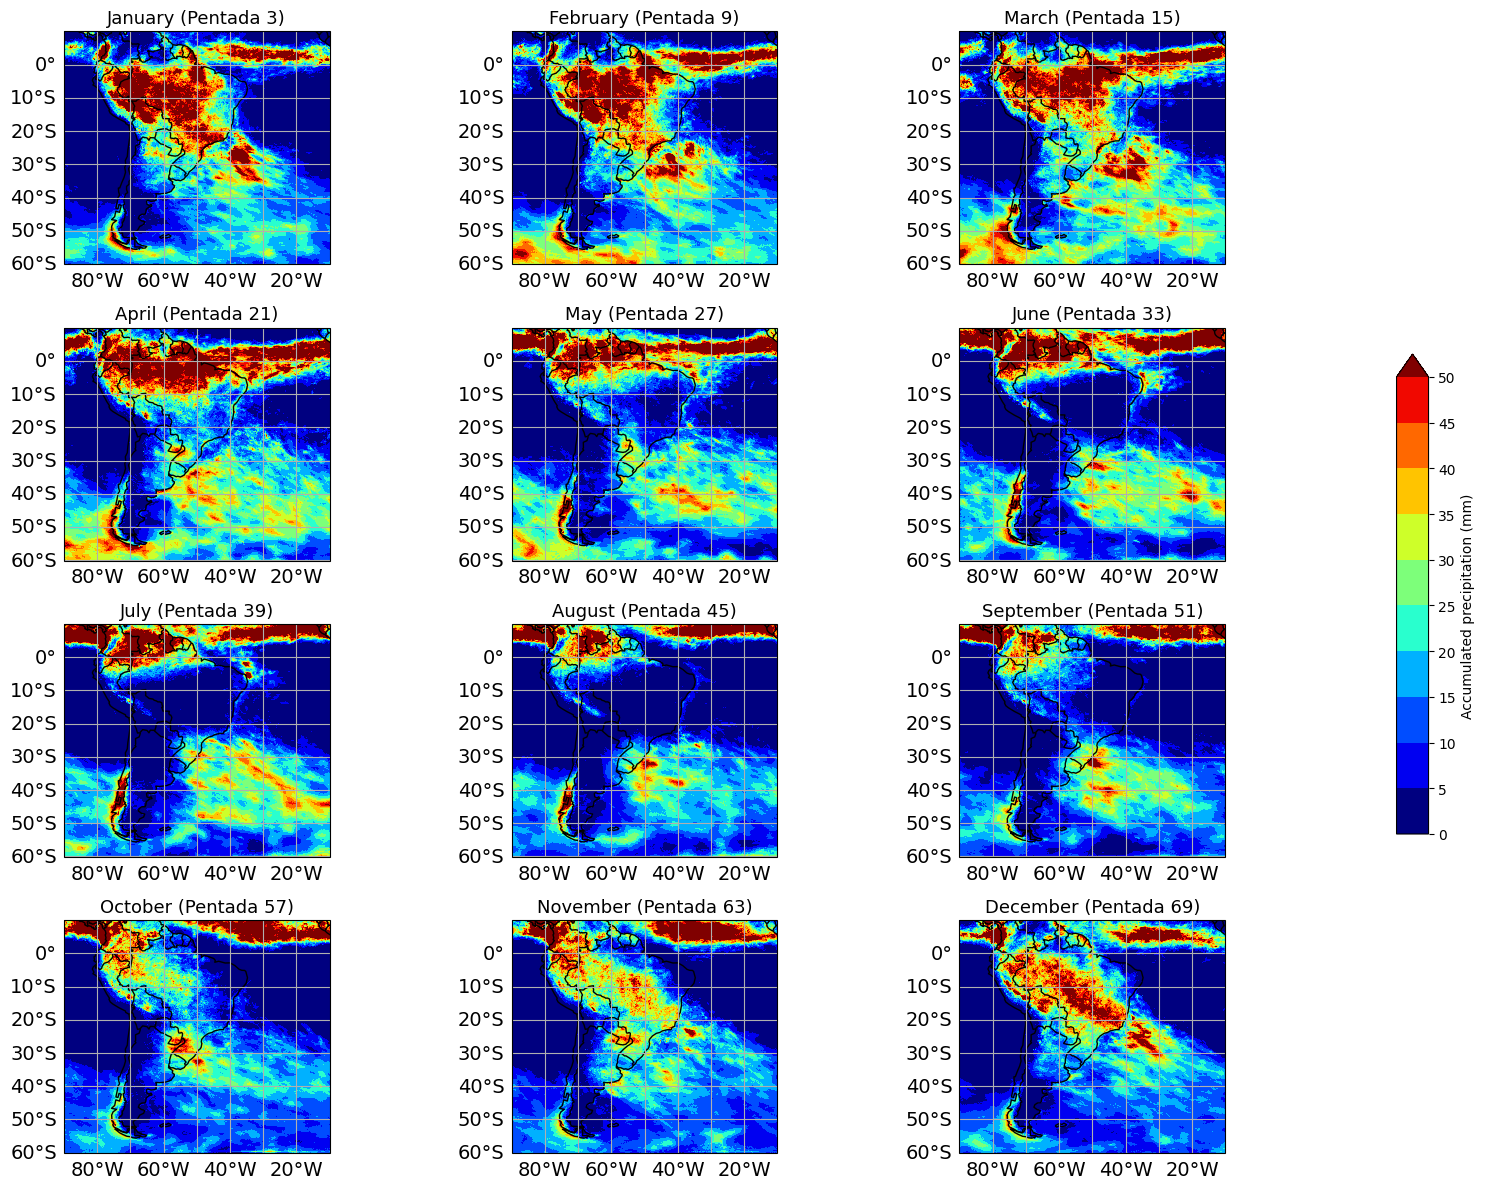

In [16]:
# Definir número de linhas e colunas para o grid de plots
n_rows = 4  # 4 linhas
n_cols = 3  # 4 colunas

# Pentadas representativas de cada mês
pentadas_por_mes = [3, 9, 15, 21, 27, 33, 39, 45, 51, 57, 63, 69]
# Titulo de cada painel
titulos_pentadas = ['January (Pentada 3)', 'February (Pentada 9)', 'March (Pentada 15)', 'April (Pentada 21)',
                    'May (Pentada 27)', 'June (Pentada 33)', 'July (Pentada 39)', 'August (Pentada 45)',
                    'September (Pentada 51)', 'October (Pentada 57)', 'November (Pentada 63)', 'December (Pentada 69)']

# Criar a figura e os eixos para múltiplos mapas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# Variável para armazenar a última imagem plotada
im = None

# Titulo por mês
title = ['January [2001-2020]', 'February [2001-2020]', 'March [2001-2020]', 'April [2001-2020]', 'May [2001-2020]', 'June [2001-2020]',
         'July [2001-2020]', 'August [2001-2020]', 'September [2001-2020]', 'October [2001-2020]', 'November [2001-2020]', 'December [2001-2020]']

# Loop para plotar cada pentada em um subplot
for i, ax in enumerate(axes.flat):  # Percorre todos os subplots
    if i < len(pentadas_por_mes):

        pentada = pentadas_por_mes[i]
        # Plotar os dados para a pentada correspondente e armazenar a última imagem
        im = clima_pentada.sel(pentada=pentada).plot(
            ax=ax,
            x='lon',
            y='lat',
            vmin=0,
            vmax=50,
            levels = np.arange(0,51,5),
            cmap='jet',#cmocean.cm.rain,
            transform=ccrs.PlateCarree(),
            add_colorbar=False)  # Evita múltiplas barras de cor

        # Adicionar feições geográficas
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
        ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.5)
        ax.add_feature(cfeature.LAKES, edgecolor='black')

        # Agregando linhas da grade
        gl = ax.gridlines(draw_labels = True)
        # Removendo os labels da grade do lado superior
        gl.top_labels = False
        # Removendo os labels da grade do lado direito
        gl.right_labels = False
        # Estabelendo o size dos labels no eixo X
        gl.xlabel_style = {'size': 14}
        # Estabelecendo o size dos labels no eixo Y
        gl.ylabel_style = {'size': 14}

        # Adicionar título com a data correspondente
        ax.set_title(titulos_pentadas[i], fontsize=13)

    else:
        ax.set_visible(False)  # Esconder subplot vazio caso haja menos de 16 tempos

# Adicionar barra de cores comum à direita da figura usando a última imagem plotada
if im is not None:
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # Posição da barra de cores
    plt.colorbar(im, cax=cbar_ax, ticks=np.arange(0, 51, 5), label='Accumulated precipitation (mm)')

# Ajustar layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Deixar espaço para a barra de cores

# Mostrar os mapas
plt.show()